In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

In [ ]:
data = pd.read_csv('./gdrive/MyDrive/Colab Notebooks/NLP/data_set_4.csv')
data

,Unnamed: 0,Link,Text,Label
0,0,https://t.me/c/1376264484/328,"Просто слухайте цей діалог. Ні, це не нарізка ...",True
1,1,https://t.me/c/1376264484/338,️ Рубль став найнестабільнішою валютою у всьом...,True
2,2,https://t.me/c/1376264484/350,Перше звернення мера Мелітополя Івана Федорова...,True
3,3,https://t.me/c/1376264484/361,"Росія загрожує Боснії ""українським сценарієм"" ...",True
4,4,https://t.me/c/1376264484/366,"Енергоатом повідомив, що окупанти пошкодили ви...",True
...,...,...,...,...
10730,2241,https://t.me/warfakes/8878,"Громадян Таджикистану, який убив 11 людей на п...",False
10731,2242,https://t.me/warfakes/8903,: Російська туристична компанія помилково відп...,False
10732,2243,https://t.me/warfakes/8907,Відеозвернення губернатора Херсонської області...,False
10733,2244,https://t.me/warfakes/8909,"Росіяни на Новий рік залишаться без текіли, бу...",False


In [ ]:
pip install stop_words

In [ ]:
data['Label'] = data['Label'].apply(lambda x: 0 if 'False' in str(x) else 1)
data

,Unnamed: 0,Link,Text,Label
0,0,https://t.me/c/1376264484/328,"Просто слухайте цей діалог. Ні, це не нарізка ...",1
1,1,https://t.me/c/1376264484/338,️ Рубль став найнестабільнішою валютою у всьом...,1
2,2,https://t.me/c/1376264484/350,Перше звернення мера Мелітополя Івана Федорова...,1
3,3,https://t.me/c/1376264484/361,"Росія загрожує Боснії ""українським сценарієм"" ...",1
4,4,https://t.me/c/1376264484/366,"Енергоатом повідомив, що окупанти пошкодили ви...",1
...,...,...,...,...
10730,2241,https://t.me/warfakes/8878,"Громадян Таджикистану, який убив 11 людей на п...",0
10731,2242,https://t.me/warfakes/8903,: Російська туристична компанія помилково відп...,0
10732,2243,https://t.me/warfakes/8907,Відеозвернення губернатора Херсонської області...,0
10733,2244,https://t.me/warfakes/8909,"Росіяни на Новий рік залишаться без текіли, бу...",0


In [ ]:
from stop_words import get_stop_words
stop_words_uk = get_stop_words('uk')

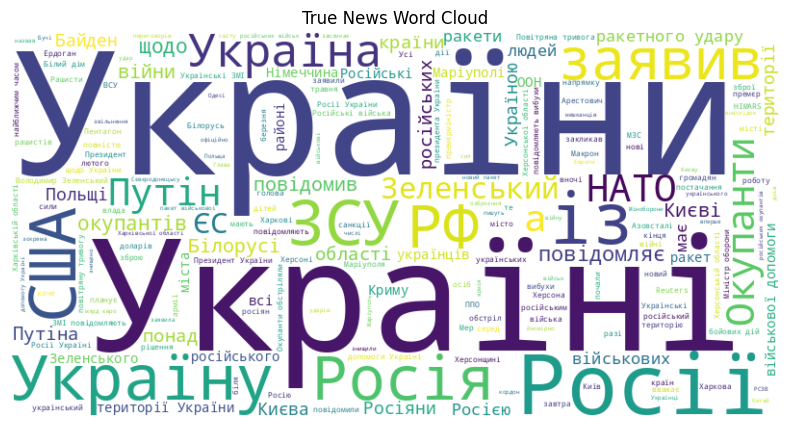

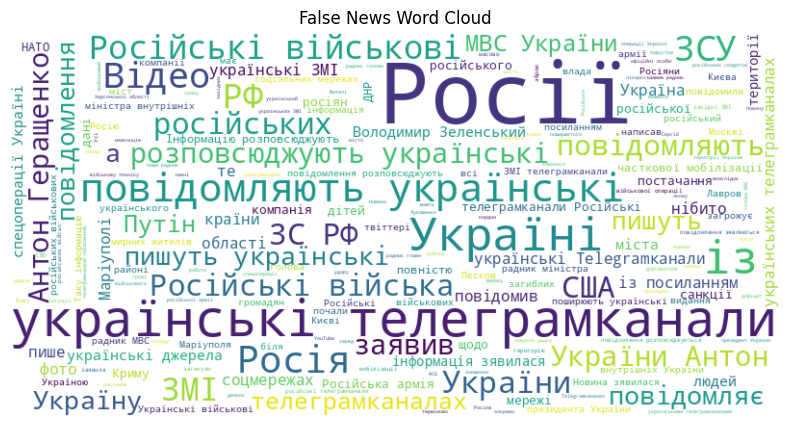

In [ ]:
import re

# Function to clean text data
def clean_text(text):
    # Remove non-alphabetical characters using regular expression
    cleaned_text = re.sub(r'[^а-щА-ЩЬьЮюЯяЇїІіЄєҐґa-zA-Z\s]', '', str(text))
    return cleaned_text

# Apply text cleaning to the 'text' column
data['cleaned_text'] = data['Text'].apply(clean_text)

# Separate data into true and false news
true_data = data[data['Label'] == 1]['cleaned_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word.lower() not in stop_words_uk]))
false_data = data[data['Label'] == 0]['cleaned_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word.lower() not in stop_words_uk]))

# Function to generate and plot word clouds
def plot_word_cloud(data, title):
    if len(data) > 0:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data))
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(title)
        plt.show()
    else:
        print(f"No data available for {title}.")

# Plot word cloud for true news
plot_word_cloud(true_data, 'True News Word Cloud')

# Plot word cloud for false news
plot_word_cloud(false_data, 'False News Word Cloud')

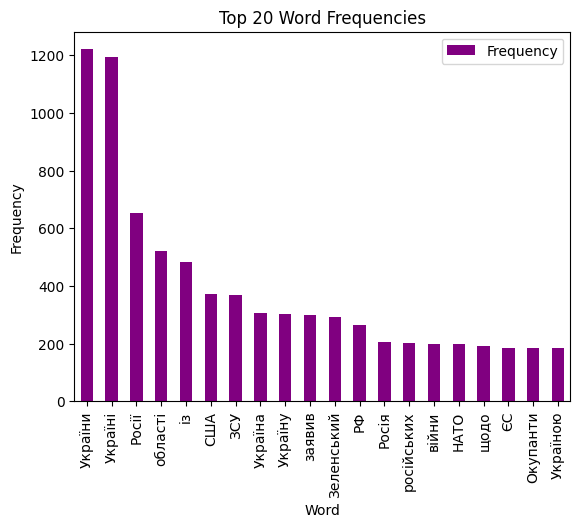

In [ ]:
from collections import Counter

# Combine all texts into a single string
all_text = ' '.join(true_data)

# Tokenize words
words = all_text.split()

# Count word frequencies
word_counts = Counter(words)

# Plot bar chart of top N words
top_words = word_counts.most_common(20)
top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])
top_words_df.plot(kind='bar', x='Word', y='Frequency', color='purple')
plt.title('Top 20 Word Frequencies')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

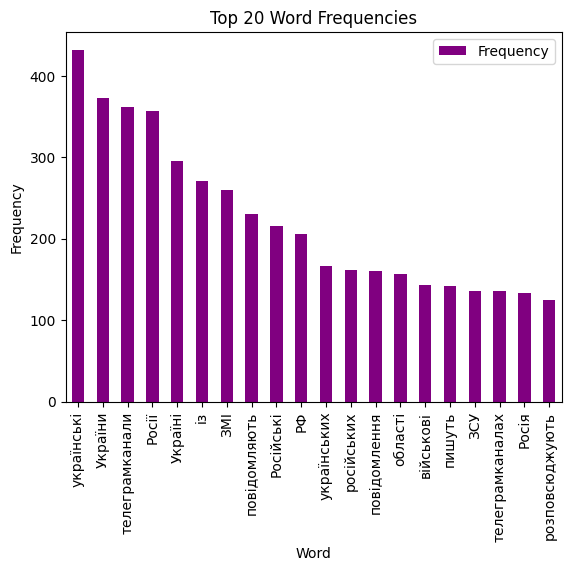

In [ ]:
from collections import Counter

# Combine all texts into a single string
all_text = ' '.join(false_data)

# Tokenize words
words = all_text.split()

# Count word frequencies
word_counts = Counter(words)

# Plot bar chart of top N words
top_words = word_counts.most_common(20)
top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])
top_words_df.plot(kind='bar', x='Word', y='Frequency', color='purple')
plt.title('Top 20 Word Frequencies')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data['cleaned_text'], data['Label'], test_size=0.2, random_state=7)

In [ ]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(max_df=0.7)

#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train)
tfidf_test=tfidf_vectorizer.transform(x_test)

In [ ]:
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 89.85%


Confusion Matrix:
[[ 365  133]
 [  85 1564]]


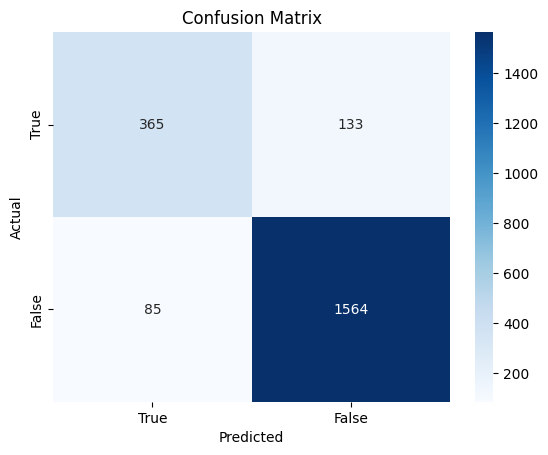

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier

# Assuming you have already defined tfidf_train, tfidf_test, y_train, and y_test

# Initialize an XGBClassifier
xgb_classifier = XGBClassifier()

# Fit the XGBClassifier on the training set
xgb_classifier.fit(tfidf_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_classifier.predict(tfidf_test)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {round(accuracy_xgb * 100, 2)}%')

XGBoost Accuracy: 89.89%


In [ ]:
import pickle

# Assuming you have the trained XGBoost model (xgb_classifier) and the TfidfVectorizer (tfidf_vectorizer) from the previous code

# Function to preprocess and predict on user input
def predict_fake_news_user_input():
    # Get user input
    user_text = input("Enter the text you want to analyze: ")

    # Preprocess the user input using the same TfidfVectorizer
    tfidf_user_text = tfidf_vectorizer.transform([user_text])

    # Make the prediction
    prediction = xgb_classifier.predict(tfidf_user_text)[0]

    # Return the prediction
    return prediction

# Example usage
prediction_result_user_input = predict_fake_news_user_input()

# Print the result
print(f'Prediction: {prediction_result_user_input}')

Enter the text you want to analyze: Перше звернення мера Мелітополя Івана Федорова після звільнення
Prediction: 1


In [ ]:
# Save the XGBoost model
with open('xgb_model.pkl', 'wb') as model_file:
    pickle.dump(xgb_classifier, model_file)

# Save the TfidfVectorizer
with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf_vectorizer, vectorizer_file)

In [ ]:
pip install python-telegram-bot==13.7

In [ ]:
from telegram import Update
from telegram.ext import Updater, CommandHandler, MessageHandler, CallbackContext, Filters
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
import pickle

# Load the pre-trained XGBoost model and TfidfVectorizer
with open('xgb_model.pkl', 'rb') as model_file:
    xgb_classifier = pickle.load(model_file)

with open('tfidf_vectorizer.pkl', 'rb') as vectorizer_file:
    tfidf_vectorizer = pickle.load(vectorizer_file)

# Function to preprocess and predict on user input
def predict_fake_news_user_input(update: Update, context: CallbackContext) -> None:
    # Get user input
    user_text = update.message.text

    # Preprocess the user input using the same TfidfVectorizer
    tfidf_user_text = tfidf_vectorizer.transform([user_text])

    # Make the prediction
    prediction = xgb_classifier.predict(tfidf_user_text)[0]

    if prediction == 1:
      # Return the prediction to the user
      update.message.reply_text(f'Це достовірна інформація')
    else:
      update.message.reply_text(f'Це фейк')

# Function to display instructions when /start command is issued
def start(update: Update, context: CallbackContext) -> None:
    instructions = (
        "Вас вітає бот, який здатен розпізнати фейкові новини!\n"
        "Будь ласка, введіть текст, який хочете перевірити.\n\n"
    )
    update.message.reply_text(instructions)

# Define the main function to run the Telegram bot
def main() -> None:
    # Initialize the Updater with your bot token
    updater = Updater("6964755218:AAGGyDkDrUrGP9jU05ftb2L0sp1dG3OvGos", use_context=True)

    # Get the dispatcher to register handlers
    dp = updater.dispatcher

    # Register the command and message handlers
    dp.add_handler(CommandHandler("start", start))
    dp.add_handler(MessageHandler(Filters.text & ~Filters.command, predict_fake_news_user_input))

    # Start the Bot
    updater.start_polling()

    # Run the bot until you send a signal to stop
    updater.idle()

if __name__ == '__main__':
    main()